In [1]:
#importing required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder,LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

In [2]:
df_train=pd.read_csv("Train.csv") #training_data

In [3]:
df_test=pd.read_csv("Test.csv") #Testing data

In [4]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 209499 entries, 0 to 209498
Data columns (total 43 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   ID                              209499 non-null  object 
 1   age                             209499 non-null  int64  
 2   gender                          209499 non-null  object 
 3   education                       209499 non-null  object 
 4   class                           104254 non-null  object 
 5   education_institute             13302 non-null   object 
 6   marital_status                  209499 non-null  object 
 7   race                            209499 non-null  object 
 8   is_hispanic                     209499 non-null  object 
 9   employment_commitment           209499 non-null  object 
 10  unemployment_reason             6520 non-null    object 
 11  employment_stat                 209499 non-null  int64  
 12  wage_per_hour   

In [5]:
X_train=df_train.iloc[:,:-2]
Y_train=df_train.iloc[:,-1]
X_test=df_test

In [6]:
le=LabelEncoder()

In [7]:
df_train['income_above_limit'].head(2)

0    Below limit
1    Below limit
Name: income_above_limit, dtype: object

In [8]:
# Using map function
df_train['income_above_limit'] = df_train['income_above_limit'].map({'Above limit': 1, 'Below limit': 0}) #labeling our target columns

In [9]:
df_train['income_above_limit'].head(2)

0    0
1    0
Name: income_above_limit, dtype: int64

In [10]:
_missing_val=pd.DataFrame(df_train.isnull().sum()/df_train.shape[0]*100)
_missing_val=_missing_val.rename(columns={0: '%_missing_val'})
_missing_val

,%_missing_val
ID,0.000000
age,0.000000
gender,0.000000
education,0.000000
class,50.236517
education_institute,93.650566
marital_status,0.000000
race,0.000000
is_hispanic,0.000000
employment_commitment,0.000000


In [11]:
#handeling missing values
original_class=pd.DataFrame(df_train["class"].value_counts()/df_train.shape[0])

df_train['Class_imputed']=df_train['class']

df_train['Class_imputed'][df_train['Class_imputed'].isnull()] = df_train['class'].dropna().sample(df_train['class'].isnull().sum(),replace=True).values

C:\Users\omshr\AppData\Local\Temp\ipykernel_40256\1217463086.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train['Class_imputed'][df_train['Class_imputed'].isnull()] = df_train['class'].dropna().sample(df_train['class'].isnull().sum(),replace=True).values


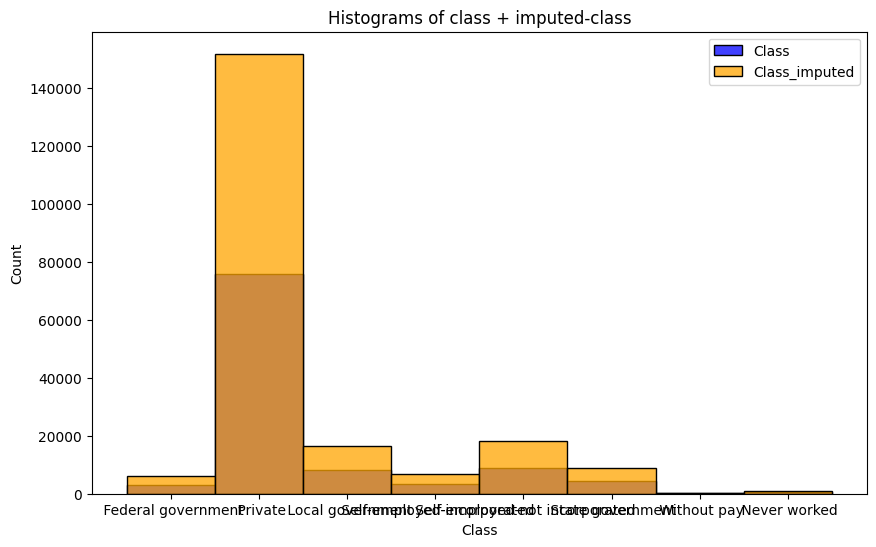

In [12]:
# Count the occurrences of each category
class_counts = df_train['class'].value_counts()
class_count_imputed= df_train['Class_imputed'].value_counts()
# Plotting histograms using seaborn
plt.figure(figsize=(10, 6))
sns.histplot(df_train['class'], color='blue', label='Class', stat='count', discrete=True)
sns.histplot(df_train['Class_imputed'], color='orange', label='Class_imputed', stat='count', discrete=True)

# Adding labels and legend
plt.xlabel('Class')
plt.ylabel('Count')
plt.title('Histograms of class + imputed-class')
plt.legend()

# Show the plot
plt.show()

In [13]:
#removing features from training with significant missing values
df_train.drop(columns=['ID','class','education_institute','unemployment_reason','is_labor_union','occupation_code_main','under_18_family','veterans_admin_questionnaire','migration_prev_sunbelt','residence_1_year_ago','old_residence_reg','old_residence_state','Class_imputed'],inplace=True)
#removing features from testing with significant missing values
df_test.drop(columns=['ID','class','education_institute','unemployment_reason','is_labor_union','occupation_code_main','under_18_family','veterans_admin_questionnaire','migration_prev_sunbelt','residence_1_year_ago','old_residence_reg','old_residence_state'],inplace=True)

In [14]:
_missing_val=pd.DataFrame(df_train.isnull().sum()/df_train.shape[0]*100)
_missing_val=_missing_val.rename(columns={0: '%_missing_val'})
_missing_val #data having greater than 40% loss values

,%_missing_val
age,0.000000
gender,0.000000
education,0.000000
marital_status,0.000000
race,0.000000
is_hispanic,0.000000
employment_commitment,0.000000
employment_stat,0.000000
wage_per_hour,0.000000
working_week_per_year,0.000000


In [15]:
_missing_val[_missing_val['%_missing_val']>0]

,%_missing_val
migration_code_change_in_msa,0.757999
migration_code_move_within_reg,0.757999
migration_code_change_in_reg,0.757999


In [16]:
#handling missing values
original_class=pd.DataFrame(df_train["migration_code_change_in_msa"].value_counts()/df_train.shape[0])

df_train['migration_code_change_in_msa_imputed']=df_train['migration_code_change_in_msa']

df_train['migration_code_change_in_msa_imputed'][df_train['migration_code_change_in_msa_imputed'].isnull()] = df_train['migration_code_change_in_msa'].dropna().sample(df_train['migration_code_change_in_msa'].isnull().sum(),replace=True).values

C:\Users\omshr\AppData\Local\Temp\ipykernel_40256\3427257974.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train['migration_code_change_in_msa_imputed'][df_train['migration_code_change_in_msa_imputed'].isnull()] = df_train['migration_code_change_in_msa'].dropna().sample(df_train['migration_code_change_in_msa'].isnull().sum(),replace=True).values


In [17]:
#handling missing values
original_class=pd.DataFrame(df_test["migration_code_change_in_msa"].value_counts()/df_test.shape[0])

df_test['migration_code_change_in_msa_imputed']=df_test['migration_code_change_in_msa']

df_test['migration_code_change_in_msa_imputed'][df_test['migration_code_change_in_msa_imputed'].isnull()] = df_test['migration_code_change_in_msa'].dropna().sample(df_test['migration_code_change_in_msa'].isnull().sum(),replace=True).values

C:\Users\omshr\AppData\Local\Temp\ipykernel_40256\2765571039.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_test['migration_code_change_in_msa_imputed'][df_test['migration_code_change_in_msa_imputed'].isnull()] = df_test['migration_code_change_in_msa'].dropna().sample(df_test['migration_code_change_in_msa'].isnull().sum(),replace=True).values


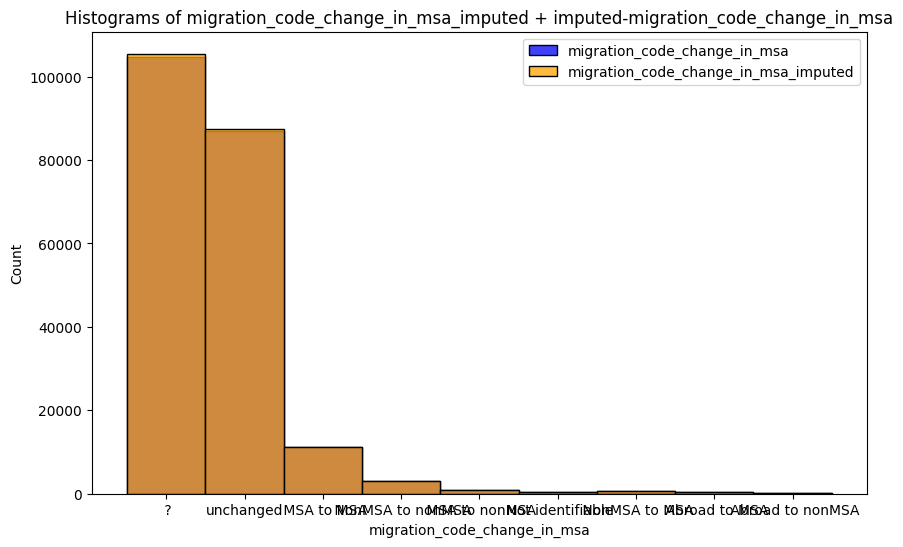

In [18]:
# Count the occurrences of each category
class_counts = df_train['migration_code_change_in_msa'].value_counts()
class_count_imputed= df_train['migration_code_change_in_msa_imputed'].value_counts()
# Plotting histograms using seaborn
plt.figure(figsize=(10, 6))
sns.histplot(df_train['migration_code_change_in_msa'], color='blue', label='migration_code_change_in_msa', stat='count', discrete=True)
sns.histplot(df_train['migration_code_change_in_msa_imputed'], color='orange', label='migration_code_change_in_msa_imputed', stat='count', discrete=True)

# Adding labels and legend
plt.xlabel('migration_code_change_in_msa')
plt.ylabel('Count')
plt.title('Histograms of migration_code_change_in_msa_imputed + imputed-migration_code_change_in_msa')
plt.legend()

# Show the plot
plt.show()

In [19]:
temp_left=pd.DataFrame(df_train['migration_code_change_in_msa'].value_counts()/df_train.shape[0]*100)
temp_right=pd.DataFrame(df_train['migration_code_change_in_msa_imputed'].value_counts()/df_train.shape[0]*100)
result_final = pd.concat([temp_left, temp_right], axis=1)
result_final #almost same perpotion so we can impute it without disturbing original behaviour of feature

,count,count
?,49.974463,50.371123
unchanged,41.462728,41.764400
MSA to MSA,5.296445,5.333200
NonMSA to nonMSA,1.385687,1.400484
MSA to nonMSA,0.371362,0.372794
NonMSA to MSA,0.306445,0.309787
Not identifiable,0.208116,0.210025
Abroad to MSA,0.199046,0.200478
Abroad to nonMSA,0.037709,0.037709


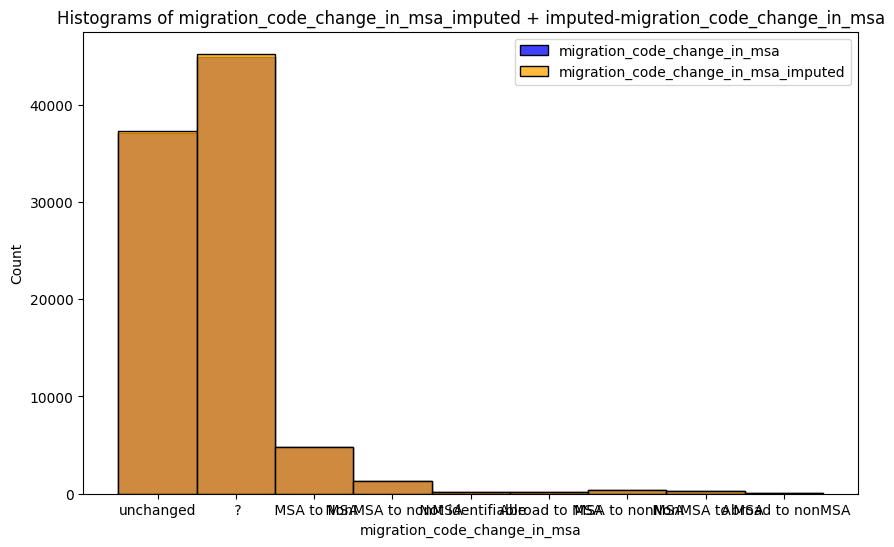

In [20]:
# Count the occurrences of each category
class_counts = df_test['migration_code_change_in_msa'].value_counts()
class_count_imputed= df_test['migration_code_change_in_msa_imputed'].value_counts()
# Plotting histograms using seaborn
plt.figure(figsize=(10, 6))
sns.histplot(df_test['migration_code_change_in_msa'], color='blue', label='migration_code_change_in_msa', stat='count', discrete=True)
sns.histplot(df_test['migration_code_change_in_msa_imputed'], color='orange', label='migration_code_change_in_msa_imputed', stat='count', discrete=True)

# Adding labels and legend
plt.xlabel('migration_code_change_in_msa')
plt.ylabel('Count')
plt.title('Histograms of migration_code_change_in_msa_imputed + imputed-migration_code_change_in_msa')
plt.legend()

# Show the plot
plt.show()

In [21]:
temp_left=pd.DataFrame(df_test['migration_code_change_in_msa'].value_counts()/df_test.shape[0]*100)
temp_right=pd.DataFrame(df_test['migration_code_change_in_msa_imputed'].value_counts()/df_test.shape[0]*100)
result_final = pd.concat([temp_left, temp_right], axis=1)
result_final #almost same perpotion so we can impute it without disturbing original behaviour of feature

,count,count
?,50.059029,50.412091
unchanged,41.290402,41.588889
MSA to MSA,5.339362,5.389482
NonMSA to nonMSA,1.394427,1.403337
MSA to nonMSA,0.418774,0.424342
NonMSA to MSA,0.298488,0.300715
Abroad to MSA,0.224979,0.230548
Not identifiable,0.216069,0.216069
Abroad to nonMSA,0.033413,0.034527


In [22]:
df_test['migration_code_change_in_msa']=df_test['migration_code_change_in_msa_imputed']

In [23]:
df_train['migration_code_change_in_msa']=df_train['migration_code_change_in_msa_imputed']

In [24]:
#handling missing values
original_class=pd.DataFrame(df_train["migration_code_change_in_msa"].value_counts()/df_train.shape[0])

df_train['migration_code_change_in_msa_imputed']=df_train['migration_code_change_in_msa']

df_train['migration_code_change_in_msa_imputed'][df_train['migration_code_change_in_msa_imputed'].isnull()] = df_train['migration_code_change_in_msa'].dropna().sample(df_train['migration_code_change_in_msa'].isnull().sum(),replace=True).values

C:\Users\omshr\AppData\Local\Temp\ipykernel_40256\3427257974.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train['migration_code_change_in_msa_imputed'][df_train['migration_code_change_in_msa_imputed'].isnull()] = df_train['migration_code_change_in_msa'].dropna().sample(df_train['migration_code_change_in_msa'].isnull().sum(),replace=True).values


In [25]:
df_train[['gender','income_above_limit']].groupby('gender').mean()*100

,income_above_limit
gender,
Female,2.562877
Male,10.137517


<Axes: xlabel='gender'>

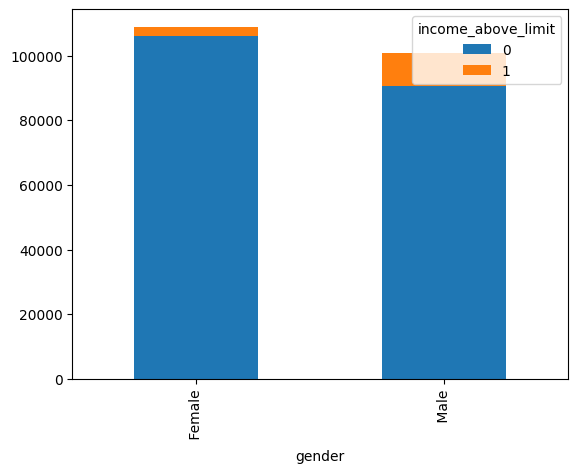

In [26]:
# Group by 'gender' and plot the bar chart
df_train.groupby('gender')['income_above_limit'].value_counts().unstack().plot(kind='bar', stacked=True)

<Axes: xlabel='education'>

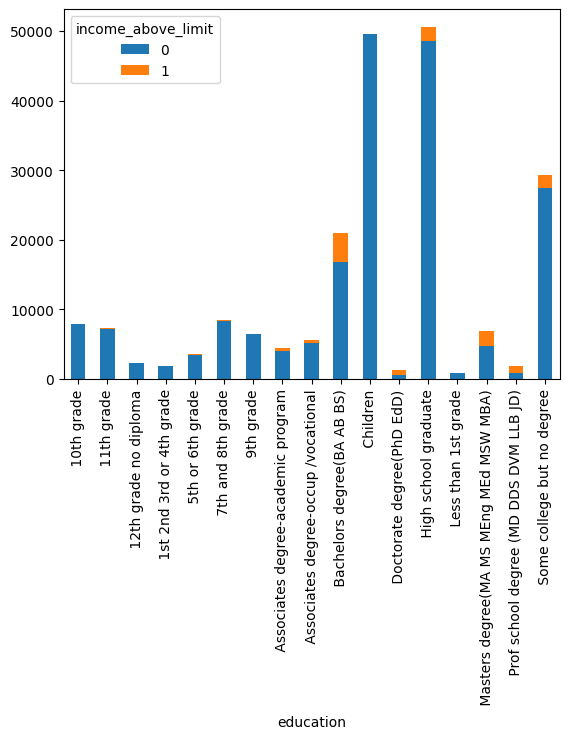

In [27]:
# Group by 'gender' and plot the bar chart
df_train.groupby('education')['income_above_limit'].value_counts().unstack().plot(kind='bar', stacked=True)

In [28]:
df_train[['education','income_above_limit']].groupby('education').mean()*100

,income_above_limit
education,
10th grade,0.809614
11th grade,1.129477
12th grade no diploma,1.533742
1st 2nd 3rd or 4th grade,0.782473
5th or 6th grade,0.846979
7th and 8th grade,0.853283
9th grade,0.672783
Associates degree-academic program,9.190031
Associates degree-occup /vocational,7.238938


<Axes: xlabel='marital_status'>

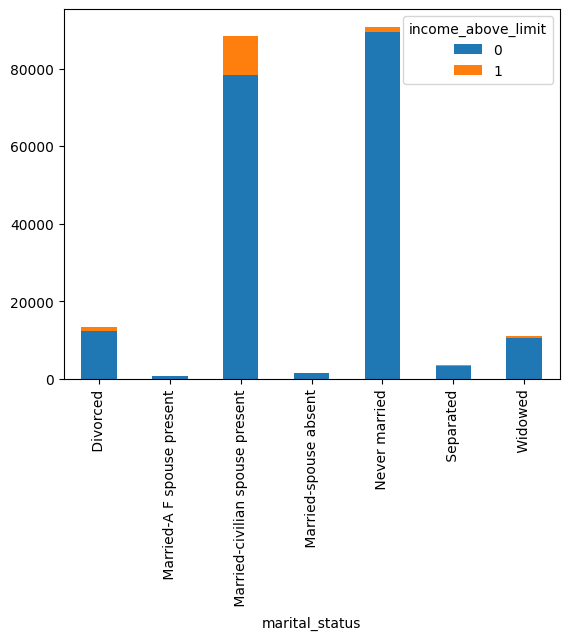

In [29]:
df_train.groupby('marital_status')['income_above_limit'].value_counts().unstack().plot(kind='bar', stacked=True)

In [30]:
df_train[['marital_status','income_above_limit']].groupby('marital_status').mean()*100

,income_above_limit
marital_status,
Divorced,8.137634
Married-A F spouse present,1.805556
Married-civilian spouse present,11.417648
Married-spouse absent,6.632653
Never married,1.289640
Separated,4.365962
Widowed,3.309457


In [31]:
df_train['migration_code_move_within_reg'].value_counts()

migration_code_move_within_reg
 ?                               104696
unchanged                         86864
 Same county                      10196
 Different county same state       2946
 Different state in South          1003
 Different state in West            735
 Different state in Midwest         560
 Abroad                             498
 Different state in Northeast       413
Name: count, dtype: int64

In [32]:
#handling missing values
original_class=pd.DataFrame(df_train["migration_code_change_in_msa"].value_counts()/df_train.shape[0])

df_train['migration_code_change_in_msa_imputed']=df_train['migration_code_change_in_msa']

df_train['migration_code_change_in_msa_imputed'][df_train['migration_code_change_in_msa_imputed'].isnull()] = df_train['migration_code_change_in_msa'].dropna().sample(df_train['migration_code_change_in_msa'].isnull().sum(),replace=True).values

C:\Users\omshr\AppData\Local\Temp\ipykernel_40256\3427257974.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train['migration_code_change_in_msa_imputed'][df_train['migration_code_change_in_msa_imputed'].isnull()] = df_train['migration_code_change_in_msa'].dropna().sample(df_train['migration_code_change_in_msa'].isnull().sum(),replace=True).values


In [33]:
df_train['migration_code_change_in_reg'].value_counts()

migration_code_change_in_reg
 ?                                 104696
unchanged                           86864
 Same county                        10196
 Different county same state         2946
 Different region                    1206
 Different state same division       1018
 Abroad                               498
 Different division same region       487
Name: count, dtype: int64

In [34]:
df_train[['migration_code_change_in_reg','migration_code_move_within_reg']].sample(10) #duplicate columns

,migration_code_change_in_reg,migration_code_move_within_reg
146114,?,?
74480,unchanged,unchanged
13748,unchanged,unchanged
154770,?,?
54859,unchanged,unchanged
163618,Same county,Same county
181203,?,?
17913,unchanged,unchanged
130068,?,?
129746,?,?


In [35]:
df_train.drop(columns=['migration_code_change_in_reg','migration_code_move_within_reg','migration_code_change_in_msa_imputed'],inplace=True)

In [36]:
df_train.isnull().mean() #handeled missing values

age                             0.0
gender                          0.0
education                       0.0
marital_status                  0.0
race                            0.0
is_hispanic                     0.0
employment_commitment           0.0
employment_stat                 0.0
wage_per_hour                   0.0
working_week_per_year           0.0
industry_code                   0.0
industry_code_main              0.0
occupation_code                 0.0
total_employed                  0.0
household_stat                  0.0
household_summary               0.0
vet_benefit                     0.0
tax_status                      0.0
gains                           0.0
losses                          0.0
stocks_status                   0.0
citizenship                     0.0
mig_year                        0.0
country_of_birth_own            0.0
country_of_birth_father         0.0
country_of_birth_mother         0.0
migration_code_change_in_msa    0.0
importance_of_record        

In [37]:
# Identify categorical columns
categorical_columns = df_train.select_dtypes(include=['object']).columns.tolist()

In [38]:
df_train[categorical_columns].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 209499 entries, 0 to 209498
Data columns (total 15 columns):
 #   Column                        Non-Null Count   Dtype 
---  ------                        --------------   ----- 
 0   gender                        209499 non-null  object
 1   education                     209499 non-null  object
 2   marital_status                209499 non-null  object
 3   race                          209499 non-null  object
 4   is_hispanic                   209499 non-null  object
 5   employment_commitment         209499 non-null  object
 6   industry_code_main            209499 non-null  object
 7   household_stat                209499 non-null  object
 8   household_summary             209499 non-null  object
 9   tax_status                    209499 non-null  object
 10  citizenship                   209499 non-null  object
 11  country_of_birth_own          209499 non-null  object
 12  country_of_birth_father       209499 non-null  object
 13 

Preprocessing and cleaning of data

In [39]:
categorical_col=['gender','education','marital_status','race','is_hispanic','employment_commitment','industry_code_main','household_stat','household_summary','tax_status','citizenship','country_of_birth_own','country_of_birth_father','country_of_birth_mother','migration_code_change_in_msa']

In [40]:
#dealing with numerical columns
numerical_col=[]
for i in df_train.columns:
    if i not in categorical_columns:
        numerical_col.append(i)

In [41]:
df_train_numerical=df_train[numerical_col]

In [42]:
df_train_numerical.isnull().mean() #missing data in dataset

age                      0.0
employment_stat          0.0
wage_per_hour            0.0
working_week_per_year    0.0
industry_code            0.0
occupation_code          0.0
total_employed           0.0
vet_benefit              0.0
gains                    0.0
losses                   0.0
stocks_status            0.0
mig_year                 0.0
importance_of_record     0.0
income_above_limit       0.0
dtype: float64

In [43]:
le=LabelEncoder()

In [44]:
for i in categorical_col:
    df_train[i]=le.fit_transform(df_train[i])

In [45]:
scaler=StandardScaler()

In [46]:
for i in df_train_numerical:
    df_train[i]=le.fit_transform(df_train[i])

In [47]:
#other columns
other_col=[]
for i in df_train.columns:
    if ((i not in categorical_columns) and (i not in df_train_numerical)):
        other_col.append(i)

In [48]:
X_train=df_train.iloc[:,:-1]
Y_train=df_train.iloc[:,:-1]

In [49]:
len(X_train.columns)

28

In [50]:
X_train_valid,X_test_valid,Y_train_valid,Y_test_valid=train_test_split(X_train,Y_train,test_size=0.25,random_state=256)

In [51]:
rfc=RandomForestClassifier()

In [52]:
rfc.fit(X_train_valid,Y_train_valid)

MemoryError: could not allocate 9990127616 bytes

In [ ]:
pip install dask
